In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def undirected(year):
    G=nx.Graph()
    df=pd.read_csv(f"graphs/{year}.csv")
    for index, row in df.iterrows():
        source=row["source"]
        target=row["target"]
        weight=float(row[f"{year}"])
        if G.has_edge(row["source"],row["target"]):
            G[source][target]['weight']+=weight
        else:

            G.add_edge(source,target,weight=weight)

    return G



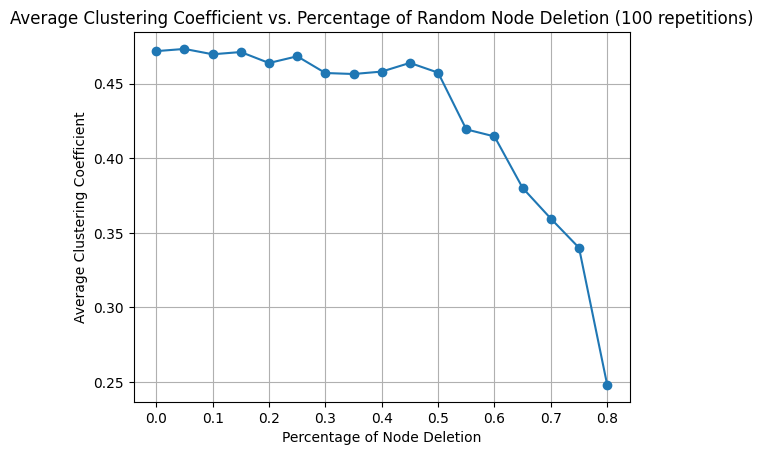

In [14]:
G=undirected(2021)
deletion_percentages = np.arange(0, 0.81, 0.05) # From 0% to 100% in steps of 10%

# Lists to store clustering coefficients and corresponding deletion percentages
clustering_coefficients = []
deletion_percentages_used = []

# Iterate over deletion percentages
# Lists to store clustering coefficients for each repetition
clustering_coefficients_avg = {percentage: [] for percentage in deletion_percentages}

# Repeat the process 100 times
num_repetitions = 100

for _ in range(num_repetitions):
    # Iterate over deletion percentages
    for percentage in deletion_percentages:
        # Make a copy of the original graph
        G_copy = G.copy()

        # Determine the number of nodes to delete
        num_nodes_to_delete = int(percentage * G.number_of_nodes())

        # Randomly select nodes to delete
        nodes_to_delete = np.random.choice(list(G_copy.nodes()), size=num_nodes_to_delete, replace=False)

        # Remove selected nodes from the graph
        G_copy.remove_nodes_from(nodes_to_delete)

        # Calculate clustering coefficient for the modified graph
        clustering_coefficient = nx.average_clustering(G_copy)

        # Append clustering coefficient to the corresponding list
        clustering_coefficients_avg[percentage].append(clustering_coefficient)

# Calculate the average clustering coefficient at each percentage of deletion
clustering_coefficients_avg = {percentage: np.mean(coefficients) for percentage, coefficients in clustering_coefficients_avg.items()}

# Plot the average clustering coefficient vs. percentage of deletion
plt.plot(list(clustering_coefficients_avg.keys()), list(clustering_coefficients_avg.values()), marker='o', linestyle='-')
plt.title("Average Clustering Coefficient vs. Percentage of Random Node Deletion (100 repetitions)")
plt.xlabel("Percentage of Node Deletion")
plt.ylabel("Average Clustering Coefficient")
plt.grid(True)
plt.savefig("cluster_images/rand_del")